# 循环神经网络（RNN）实现与正弦函数序列预测

本Notebook展示了如何使用PyTorch构建一个简单的RNN模型，并使用正弦函数生成输入序列来预测下一个时间步的值。

In [12]:
# 导入必要的库
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

## 生成非线性序列（正弦函数）
我们将生成一个长度为50的正弦波序列作为输入数据。

In [13]:
# 定义序列长度
seq_length = 1000

# 生成时间步（0到8π之间的50个点）
t = np.linspace(0, 4 * np.pi, seq_length)

# 使用正弦函数生成序列
sin_wave = np.sin(t)

# 打印生成的序列，查看前几个值
print(sin_wave[:5])

[0.         0.01257862 0.02515525 0.03772789 0.05029457]


## 定义RNN模型
我们将创建一个RNN模型，输入维度为1（表示一个时间步的值），输出维度也是1（预测下一个时间步的值）。RNN模型由一个RNN层和一个全连接层组成。

In [14]:
# 定义RNN模型类
class RNN(nn.Module):
    def __init__(self):
        super(RNN, self).__init__()
        self.rnn = nn.RNN(input_size=1, hidden_size=50, batch_first=True)  # RNN层，隐藏层50个神经元
        self.fc1 = nn.Linear(50, 50)  # 全连接层1
        self.fc2 = nn.Linear(50, 1)   # 全连接层2
        self.relu = nn.ReLU()         # 使用ReLU激活函数

    def forward(self, x):
        h0 = torch.zeros(1, x.size(0), 50)  # 初始化隐藏状态
        out, _ = self.rnn(x, h0)  # RNN输出
        out = self.fc1(out)  # 全连接层1
        out = self.relu(out)
        out = self.fc2(out)  # 全连接层2
        return out

## 数据预处理
我们需要将正弦波数据转换为模型可以接受的格式。具体来说，我们将序列中的每个时间步的值作为输入，将下一个时间步的值作为标签。

In [15]:
# 将正弦波数据转换为列向量
sin_wave = sin_wave.reshape(-1, 1)

# 创建训练数据和标签
train_data = torch.tensor(sin_wave[:-1]).float().unsqueeze(0)  # 输入序列
train_labels = torch.tensor(sin_wave[1:]).float().unsqueeze(0)  # 目标序列（滞后1个时间步）

# 查看数据维度
print(train_data.shape)  # (1, seq_length-1, 1)
print(train_labels.shape)  # (1, seq_length-1, 1)

torch.Size([1, 999, 1])
torch.Size([1, 999, 1])


## 模型训练
我们将训练RNN模型200个周期，并每隔50个周期打印一次损失值。

In [16]:
# 超参数定义
num_epochs = 1000
learning_rate = 0.01

# 创建RNN模型
model = RNN()

# 定义损失函数（均方误差）和优化器（Adam）
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

# 开始训练
for epoch in range(num_epochs):
    # 模型训练模式
    model.train()
    # 前向传播，计算模型输出
    output = model(train_data)
    # 计算损失
    loss = criterion(output, train_labels)

    # 清空梯度
    optimizer.zero_grad()
    # 反向传播，计算梯度
    loss.backward()
    # 更新模型参数
    optimizer.step()

    # 每50个周期打印一次损失值
    if (epoch + 1) % 50 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

Epoch [50/1000], Loss: 0.0006
Epoch [100/1000], Loss: 0.0000
Epoch [150/1000], Loss: 0.0000
Epoch [200/1000], Loss: 0.0000
Epoch [250/1000], Loss: 0.0000
Epoch [300/1000], Loss: 0.0000
Epoch [350/1000], Loss: 0.0000
Epoch [400/1000], Loss: 0.0000
Epoch [450/1000], Loss: 0.0000
Epoch [500/1000], Loss: 0.0000
Epoch [550/1000], Loss: 0.0000
Epoch [600/1000], Loss: 0.0000
Epoch [650/1000], Loss: 0.0000
Epoch [700/1000], Loss: 0.0000
Epoch [750/1000], Loss: 0.0000
Epoch [800/1000], Loss: 0.0000
Epoch [850/1000], Loss: 0.0000
Epoch [900/1000], Loss: 0.0000
Epoch [950/1000], Loss: 0.0000
Epoch [1000/1000], Loss: 0.0000


## 测试并画出RNN输出
我们将使用训练数据进行预测，并将RNN输出与真实序列进行对比绘制图形。

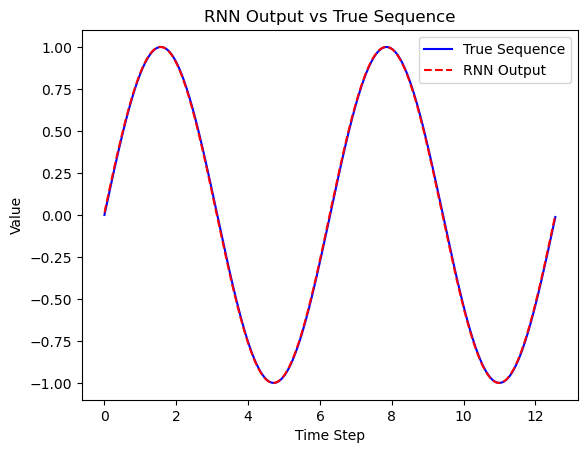

In [18]:
# 测试模型
model.eval()  # 评估模式
predicted = model(train_data).detach().numpy().flatten()  # 模型预测输出

# 绘制真实序列与RNN预测序列
plt.plot(t[:-1], sin_wave[:-1], 'b-', label='True Sequence')  # 真实序列
plt.plot(t[:-1], predicted, 'r--', label='RNN Output')  # RNN预测序列
plt.legend()
plt.xlabel('Time Step')
plt.ylabel('Value')
plt.title('RNN Output vs True Sequence')
plt.savefig('RNNresult.pdf')
plt.show()